# Chương 4. HỌC MÁY

## Mô hình hồi quy tuyến tính

Các thuật toán hồi quy là nền tảng quan trọng trong học máy, giúp mô hình hóa mối quan hệ giữa các biến. Hồi quy tuyến tính giả định mối quan hệ tuyến tính giữa biến giải thích và biến phụ thuộc, thường được ứng dụng trong các bài toán dự báo như doanh số, đầu tư hay thời tiết. Phương trình tổng quát của mô hình hồi quy tuyến tính đa biến được viết như sau:

\begin{equation}
\hat{y} = \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_3 + \cdots + \beta_n x_n + \beta_0
\end{equation}

Trong đó:

- $ \hat{y} $: Biến phụ thuộc cần dự đoán  
- $ x_1, x_2, \ldots, x_n $: Các biến giải thích (biến đầu vào)  
- $ \beta_1, \beta_2, \ldots, \beta_n $: Các hệ số góc (trọng số của từng biến)  
- $ \beta_0 $: Hệ số tự do (hay còn gọi là **hệ số chặn**, intercept)

Với cách biểu diễn trên, ta cần đi tìm véc-tơ tham số $\beta $ sao giá trị sai lệch của điểm $\hat{y}$ so với điểm $y$ (các điểm thực tế) đạt giá trị nhỏ nhất.

In [64]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
col = pd.read_csv('data\College.csv')

# 2. Tiền xử lý
col = col[['Top10perc', 'PhD', 'Terminal', 'perc.alumni', 'Grad.Rate', 'Top25perc', 'S.F.Ratio', 'Private', 'Expend']]                # bỏ cột tên trường không dùng trong tính toán
col['Private'] = col['Private'].map({'Yes':1, 'No':0}) # encode biến phân loại

# 3. Tách biến độc lập và phụ thuộc
X = col.drop(columns=['Expend'])
y = col['Expend']

# 4. Chia train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Train mô hình hồi quy tuyến tính
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# 6. Dự đoán và đánh giá
y_pred = lin_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# 7. Hiển thị kết quả đánh giá
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Squared Error (MSE): 8009425.949126803
Root Mean Squared Error (RMSE): 2830.0929223484522


In [35]:
coef_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": lin_reg.coef_
}).sort_values(by="Coefficient", ascending=False)
print(coef_df)

       Feature  Coefficient
7      Private   462.349188
0    Top10perc   180.492090
2     Terminal    45.117746
1          PhD    31.494359
3  perc.alumni     8.355968
4    Grad.Rate     1.608623
5    Top25perc   -67.892130
6    S.F.Ratio  -478.588746


In [36]:
# Hiển thị phương trình hồi quy tổng quát
intercept = lin_reg.intercept_
coefficients = lin_reg.coef_
print("\nPhương trình hồi quy tổng quát:")
equation = f"ŷ = {intercept:.4f}"
for i, coef in enumerate(coefficients):
    equation += f" + ({coef:.4f})*x{i+1}"
print(equation)


Phương trình hồi quy tổng quát:
ŷ = 8741.3403 + (180.4921)*x1 + (31.4944)*x2 + (45.1177)*x3 + (8.3560)*x4 + (1.6086)*x5 + (-67.8921)*x6 + (-478.5887)*x7 + (462.3492)*x8


## Mô hình Hồi Quy Phi Tuyến

Trong khi mô hình hồi quy tuyến tính giả định mối quan hệ tuyến tính giữa biến phụ thuộc và các biến giải thích, thì hồi quy phi tuyến mô tả những mối quan hệ phức tạp hơn, không tuân theo đường thẳng. Trong thực tế có rất nhiều các mối quan hệ như vậy, dưới đây là liệt kê của một số dạng hồi quy phi tuyến thường gặp.

### Hồi quy đa thức (Polynomial Regression) 
Hồi quy đa thức là một mở rộng của hồi quy tuyến tính, trong đó biến phụ thuộc $y$ được xấp xỉ bởi tổ hợp tuyến tính của các lũy thừa của biến giải thích $x$. Xét trên trường hợp mô hình chỉ có một biến giải thích khi đó nó có dạng tổng quát như sau:

\begin{equation}
\hat{y} = \beta_0 + \beta_1 x + \beta_2 x^2 + \cdots + \beta_p x^p
\end{equation}

Trong đó:
- $p$ là bậc của đa thức
- $\beta_0, \beta_1, \ldots, \beta_p$ là các tham số cần được xác định. 




In [65]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

# 5. Tạo đặc trưng đa thức (ví dụ bậc 2)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# 6. Train mô hình Polynomial Regression
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)

# 7. Dự đoán và đánh giá
y_pred = poly_reg.predict(X_test_poly)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# 7. Hiển thị kết quả đánh giá
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Squared Error (MSE): 5810040.386308558
Root Mean Squared Error (RMSE): 2410.402536156266


### Hồi quy logistic (Logistic Regression)
Mô hình hồi quy Logistic sử dụng phổ biến trong phân loại nhị phân với kết quả trả về ở dạng giá trị xác suất. Ý toán của hồi quy Logistic là sử dụng hàm sigmoid để biến đổi một tổ hợp tuyến tính của các biến đầu vào thành một giá trị nằm trong khoảng $(0, 1)$.

\begin{equation}
P(y=1 \mid \mathbf{x}) = \hat{p} 
= \frac{1}{1 + e^{-(\beta_0 + \beta_1 x_1 + \beta_2 x_2 + \cdots + \beta_n x_n)}}
\end{equation}

Lấy logarit hai về của phương trình ta có thể viết lại thành:

\begin{equation}
\text{logit}(\hat{p}) 
= \ln \left( \frac{\hat{p}}{1 - \hat{p}} \right) 
= \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \cdots + \beta_n x_n
\end{equation}


In [68]:

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
col = pd.read_csv('data\College.csv')
# 2. Tiền xử lý
col = col[['Top10perc', 'PhD', 'Terminal', 'perc.alumni', 'Grad.Rate', 'Top25perc', 'S.F.Ratio', 'Private', 'Expend']]                # bỏ cột tên trường không dùng trong tính toán
col['Private'] = col['Private'].map({'Yes':1, 'No':0}) # encode biến phân loại

# 3. Tách biến độc lập và phụ thuộc
X = col.drop(columns=['Private'])
y = col['Private']

# 4. Chia train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 7. Train Logistic Regression phi tuyến
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# 8. Đánh giá mô hình
y_pred = log_reg.predict(X_test)

acc = accuracy_score(y_test, y_pred)
# 7. Hiển thị kết quả đánh giá
print("Accuracy (Độ chính xác):", acc)

Accuracy (Độ chính xác): 0.8205128205128205


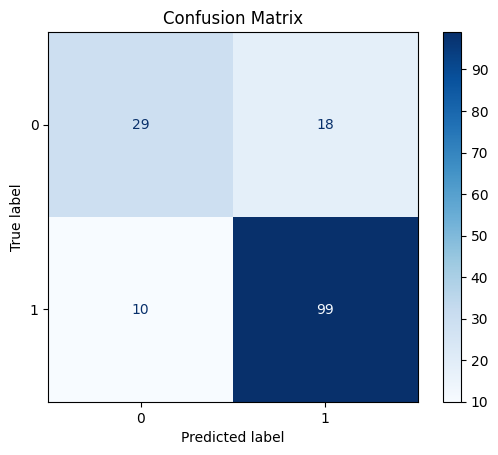

In [ ]:
# 1️⃣ Tạo ma trận nhầm lẫn
cm = confusion_matrix(y_test, y_pred)
# 3️⃣ Vẽ ma trận trực quan
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()